PTID-CDS-OCT-25-3229

Liver Patient Prediction

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Task 1
We need to do the entire data analysis because we need to know the what column is used for what feature 

In [120]:
df = pd.read_csv('indian Liver Patient Dataset.csv')

In [121]:
df
df.columns = ["Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase", "Alamine_Aminotransferase", "Aspartate_Aminotransferase", "Total_Proteins", "Albumin", "Albumin_and_Globulin_Ratio", "Target"]

In [204]:
#Basic checks

In [122]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [123]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Gender                      582 non-null    object 
 2   Total_Bilirubin             582 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        582 non-null    int64  
 5   Alamine_Aminotransferase    582 non-null    int64  
 6   Aspartate_Aminotransferase  582 non-null    int64  
 7   Total_Proteins              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  578 non-null    float64
 10  Target                      582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [125]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [205]:
#EDA

In [206]:
#here for our visualization purpose we have taken all our numeric columns and storing it in a feature
numeric_cols = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
                'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio']

In [161]:
# Check skewness value
print(df['Total_Bilirubin'].skew())

4.905546376415266


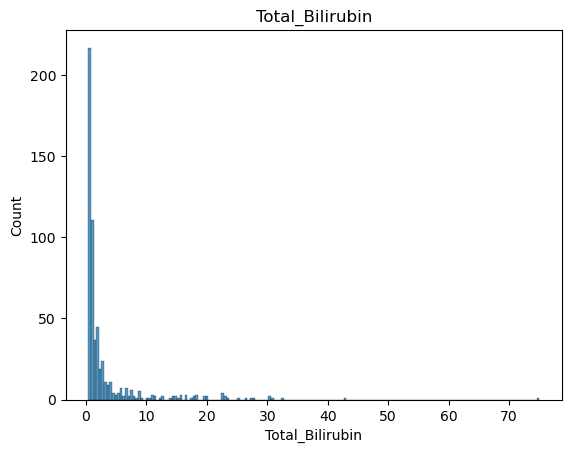

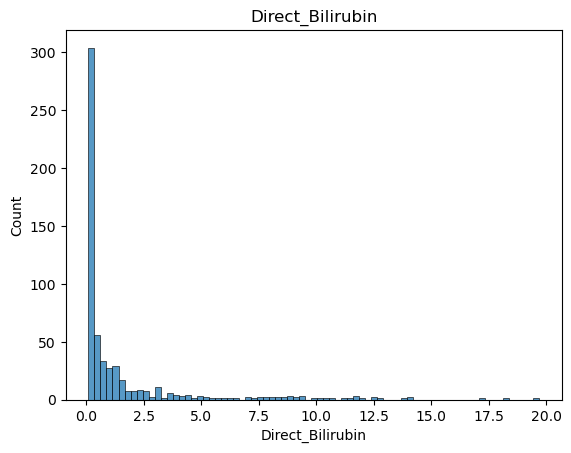

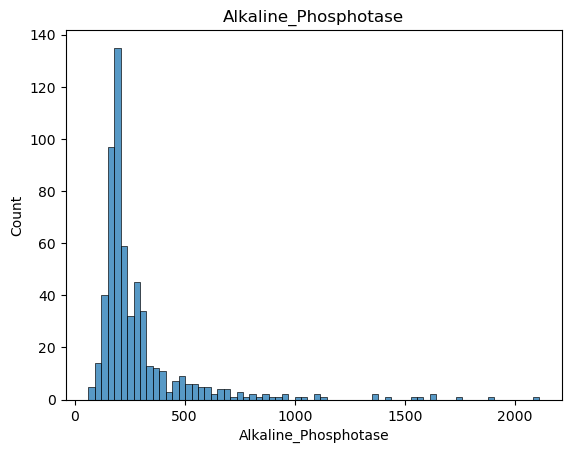

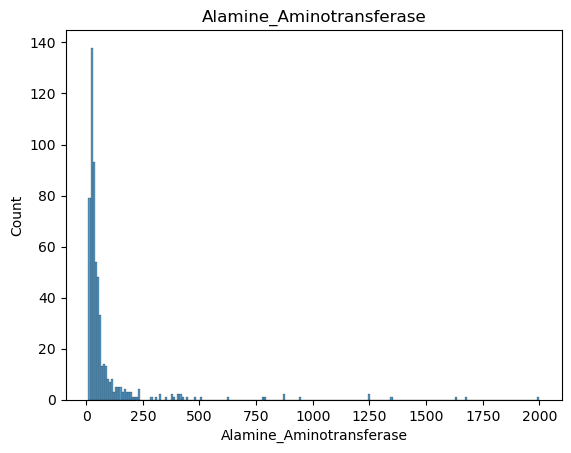

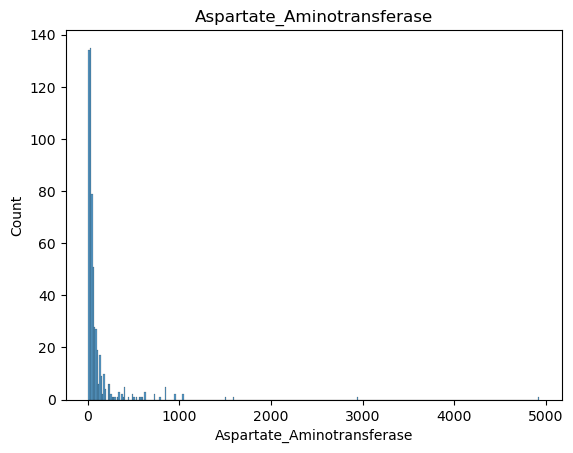

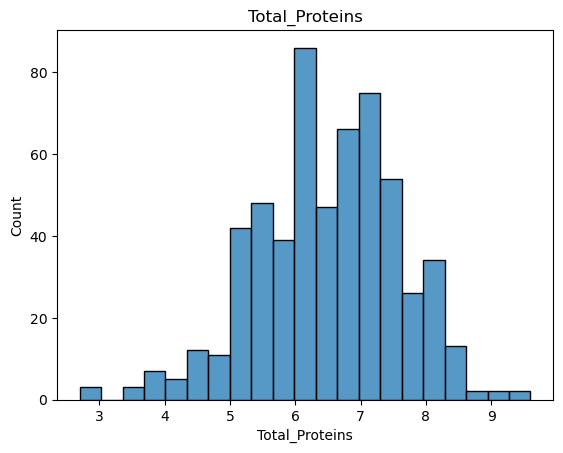

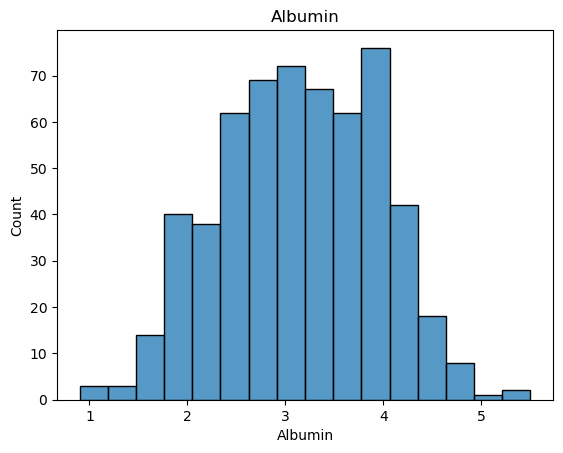

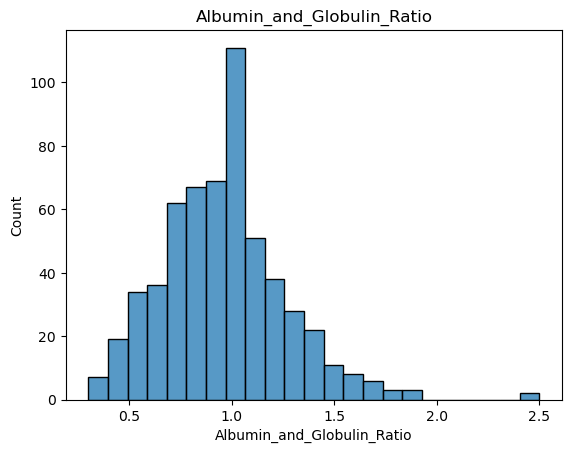

In [163]:
for col in numeric_cols:
    sns.histplot(x=df[col])
    plt.title(col)
    plt.show()

In [127]:
#here to find outliners in every column ww are appending every column into array called numerical_colum so it would be easy
numeric_cols = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
                'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio']


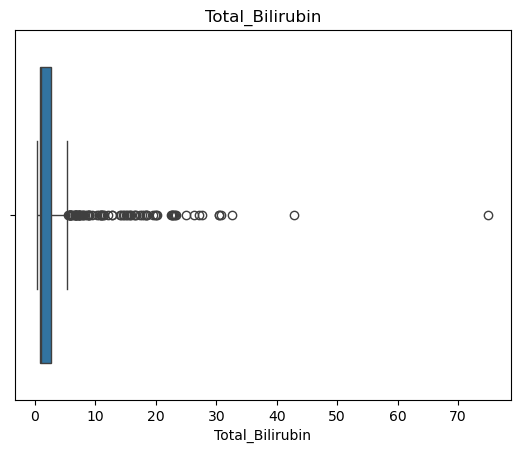

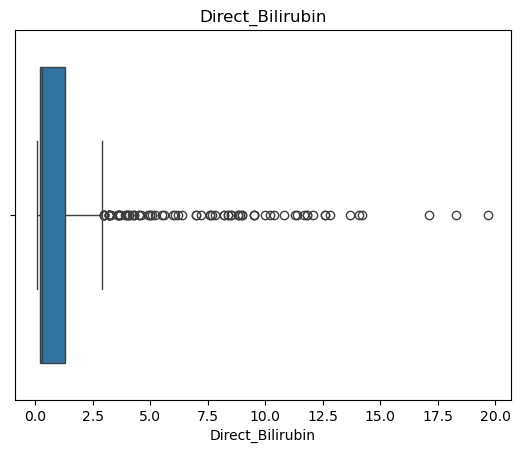

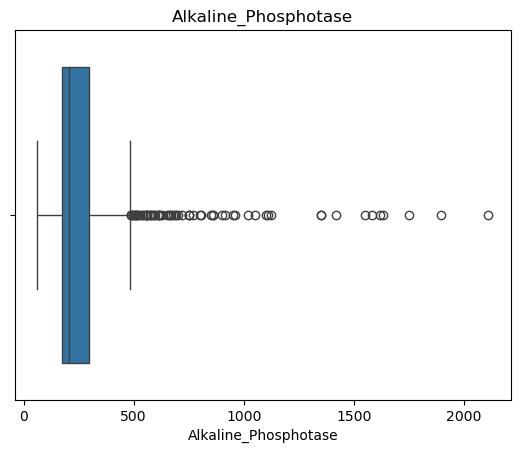

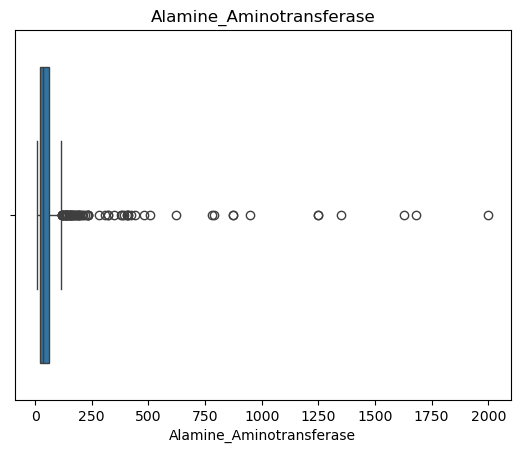

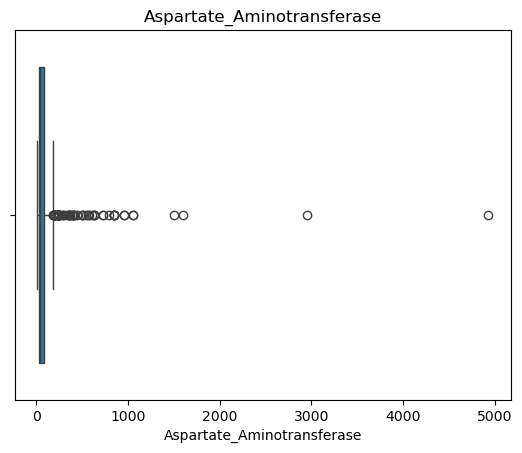

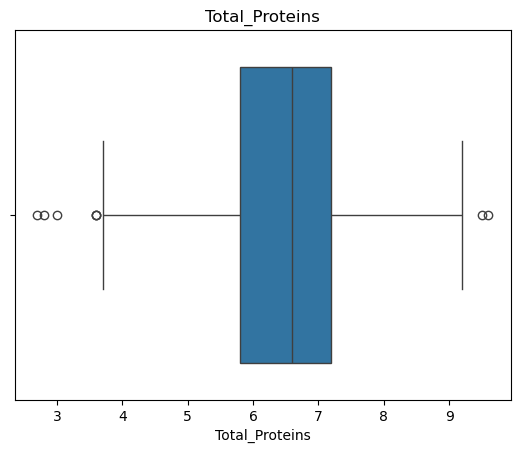

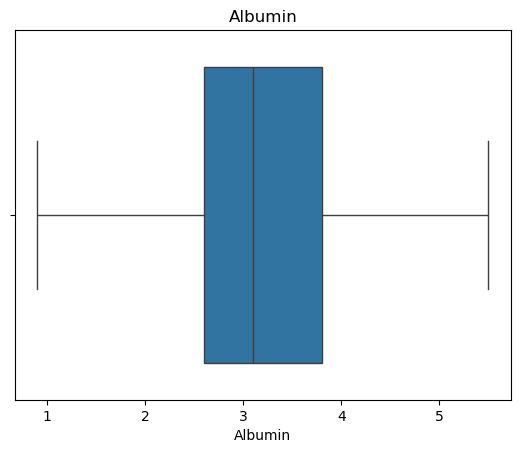

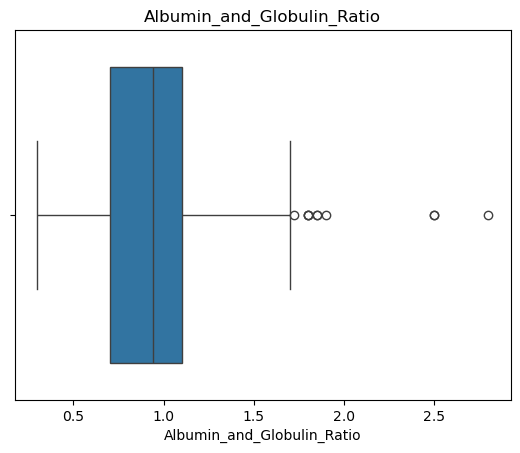

In [128]:
#so here study each boxplot and veriy from google every outliners
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


Data Preprocessing

In [129]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [130]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [131]:
df['Albumin_and_Globulin_Ratio'].median()


0.94

In [132]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'], inplace = True)

In [133]:
df.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [208]:
#as per our research,we got to know that some of outliers data is possible in the medical field for abnormal patients or as a rare case 
#so that's the reason for not removing outliers for every column 
#as we have deleting only 1 row because that much of outlier data will not be there to any person

In [134]:
#i came to know that there will be no Albumin_and_Globulin_Ratio value above 2.5,so i want to know how many colums have these type of outliners
df[df['Albumin_and_Globulin_Ratio'] > 2.5]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
547,42,Male,11.1,6.1,214,60,186,6.9,2.8,2.8,1


In [135]:
#this code will remove the outliers which have value above 2.5 value
df = df[df['Albumin_and_Globulin_Ratio'] <= 2.5]


In [136]:
#this code will show the max value of column
df['Albumin_and_Globulin_Ratio'].max()


2.5

<Axes: xlabel='Albumin_and_Globulin_Ratio'>

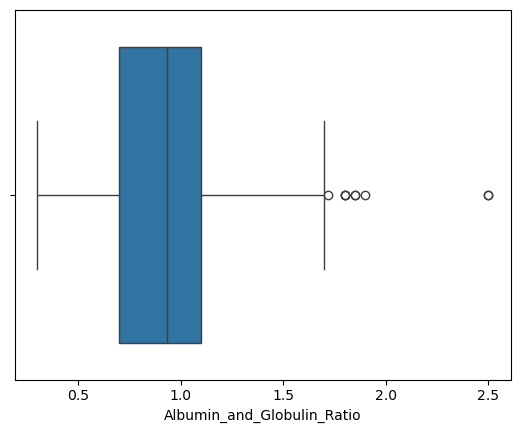

In [164]:
sns.boxplot(x=df['Albumin_and_Globulin_Ratio'])

In [137]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [138]:
#doing one hot encoding for gender colum because we need to convert categorical to numerical 
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [139]:
df

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target,Gender_Male
0,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,True
1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,True
2,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,True
3,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,True
4,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1,True
...,...,...,...,...,...,...,...,...,...,...,...
577,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,True
578,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,True
579,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,True
580,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,True


In [169]:
#converting gender column from true,false to numeric values using conversion feature integer
df.astype('int')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target,Gender_Male
0,62,10,5,699,64,100,7,3,0,1,1
1,62,7,4,490,60,68,7,3,0,1,1
2,58,1,0,182,14,20,6,3,1,1,1
3,72,3,2,195,27,59,7,2,0,1,1
4,46,1,0,208,19,14,7,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,0,0,500,20,34,5,1,0,2,1
578,40,0,0,98,35,31,6,3,1,1,1
579,52,0,0,245,48,49,6,3,1,1,1
580,31,1,0,184,29,32,6,3,1,1,1


Model Creation

Task 2 
In this task we need to build the predictive model which create a corrrect model for gib=ving us an good prediction & model

In [141]:
X = df.drop('Target', axis=1) #this is input columns
y = df['Target'] # output column

In [172]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Initialize the scaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# Fit and transform the features in the input columns
X_scaled = scaler.fit_transform(X)

# ✅ Convert scaled data back to a DataFrame (with closing parenthesis!)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [143]:
#now data is scaled between -1 to 1
X_scaled

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,1.063790,1.220104,1.426642,1.671308,-0.094238,-0.036005,0.939398,0.076957,-0.656991,0.56334
1,1.063790,0.641672,0.928741,0.813741,-0.116057,-0.146328,0.478721,0.202748,-0.173753,0.56334
2,0.817083,-0.370584,-0.387140,-0.450043,-0.366986,-0.311812,0.294450,0.328539,0.180621,0.56334
3,1.680558,0.095375,0.181890,-0.396701,-0.296071,-0.177356,0.755127,-0.929371,-1.752329,0.56334
4,0.076962,-0.242044,-0.280447,-0.343360,-0.339711,-0.332497,1.031533,1.586449,1.147096,0.56334
...,...,...,...,...,...,...,...,...,...,...
572,0.940437,-0.450922,-0.493833,0.854773,-0.334256,-0.263546,-0.534769,-1.935699,-1.848977,0.56334
573,-0.293098,-0.434854,-0.493833,-0.794711,-0.252431,-0.273888,-0.442633,0.076957,0.502779,0.56334
574,0.447023,-0.402719,-0.458268,-0.191542,-0.181517,-0.211832,-0.074092,0.076957,0.180621,0.56334
575,-0.848189,-0.322381,-0.351575,-0.441836,-0.285161,-0.270441,0.294450,0.328539,0.180621,0.56334


In [207]:
#this smoting technique is used to balance the target variable because it may effect beacause if imbalanced data 
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [173]:
(x_smote,y_smote)=smote.fit_resample(X_train,y_train)

In [175]:
from collections import Counter
Counter(y_train)

Counter({1: 329, 2: 132})

In [176]:
Counter(y_smote)

Counter({2: 329, 1: 329})

In [181]:
#We have done it on Training data 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
#train_test_split
# Train
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)

# Evaluate
print("Accuracy_train:", accuracy_score(y_train, y_train_pred))

print("Classification Report_train:\n", classification_report(y_train, y_train_pred))



Accuracy_train: 0.720173535791757
Classification Report_train:
               precision    recall  f1-score   support

           1       0.75      0.91      0.82       329
           2       0.52      0.24      0.33       132

    accuracy                           0.72       461
   macro avg       0.64      0.58      0.58       461
weighted avg       0.69      0.72      0.68       461



In [192]:
#split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
#train_test_split
# Train
model = LogisticRegression()
model.fit(X_train,y_train)

# Predict
y_pred = model.predict(X_test)

print("Accuracy_test:", accuracy_score(y_test, y_pred))
print("Confusion Matrix_test:\n", confusion_matrix(y_test, y_pred))
print("Classification Report_test:\n", classification_report(y_test, y_pred))



Accuracy_test: 0.7413793103448276
Confusion Matrix_test:
 [[77  6]
 [24  9]]
Classification Report_test:
               precision    recall  f1-score   support

           1       0.76      0.93      0.84        83
           2       0.60      0.27      0.38        33

    accuracy                           0.74       116
   macro avg       0.68      0.60      0.61       116
weighted avg       0.72      0.74      0.71       116



In [200]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sv, X,y,cv=5,scoring='accuracy')
scores
# here we are using this model because ware differentiating the data 5 times data will  be doing 5 different testing & 5 different training 
# from those 5 data we will be getting different accuracies from that that we will do median  & converting 5 data into a single accuracy score

array([0.71551724, 0.71551724, 0.71304348, 0.71304348, 0.71304348])

In [201]:
print(scores.mean())

0.7140329835082458


In [218]:
from sklearn.svm import SVC
sv = SVC(kernel = 'rbf')
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
print("Accuracy_test:",accuracy_score (y_test, y_pred))

Accuracy_test: 0.7155172413793104


In [ ]:
print(accuracy_score)

In [209]:
#Final Report

Task 3

In this model we are doing an final analysis we are building this model because whether this patient will get liver disease or not 
so from our logical thinking we have used several algorithms and we came to know that it is possible to predict whether he will get or not 
here we have logistic,support vector & cross validation from these 3 models we got to know that logistic model is predicting some good data 
so we are using that technique and also from doing above testing & training data we came to know that is overfitted data 
here we are using this model because ware differentiating the data 5 times data will  be doing 5 different testing & 5 different training 
from those 5 data we will be getting different accuracies from that that we will do median  & converting 5 data into a single accuracy score

Challenges Faced 

From the above projects the challenges i have faced is while naming the columnsnames correctly and 
also while clearing the outliers i cam to know that in that in health care there might be some rare cases which contain very rare scores 
so thats the reason for not clearing outliers for every column & from our target variable we came to know that there is lot of imbalanced data  
but if we use smoting data i came tomsee that there is drastic drop of accuuracy score so thats the reason of using our x,y origibal data 
we also used severals models all models are performing very badly compared to those above models performed godd and data is over fitted data